Gravity Model
=======

The gravity model is the workhorse of emperical international trade analysis. It is originally based around the idea of gravitational force:

$Export_{ij} = \frac{GDP_i * GDP_j}{Distance_{ij}}$

Estimating this using ordinary least squares requires linearizing the model:

$\log{Export_{ij}} = \log{GDP_i} + \log{GDP_j} - \log(Distance_{ij})$

In its most basic form distance is the physical distance between two countries. 
However in reality there are many sources of ``distance`` that are associated with the cost of trade such as landlockedness that can be added into the regression as additional explanatory variables.

Data
-----
Trade data is sourced from: http://atlas.media.mit.edu/en/resources/data/. And uses the SITC rev 2. product level trade dataset. This product level data is aggregated to form a bilateral trade dataset at the country level.

Distance and Geography is sourced from CEPII: http://www.cepii.fr/CEPII/en/bdd_modele/presentation.asp?id=6

GDP and Population statistics are from the World Development Indicators: http://data.worldbank.org/data-catalog/world-development-indicators

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

Import Data from a ``csv`` data file for the year 2013

In [2]:
data = pd.read_csv("./data/gravity_dataset_2013.csv")

In [3]:
data.head()

,year,iiso3c,eiso3c,value,contig,comlang_off,colony,dist,distcap,distw,distwces,ell,ill,egdp,egdppc,epop_x,igdp,igdppc,epop_y
0,2013,ABW,BEL,774353,0,1,0,7847.070,7847.070,7843.255,7843.006,0,0,4.204710e+11,37599.735498,11182817,NaN,NaN,102921
1,2013,ABW,BHS,4712537,0,0,0,1588.515,1588.515,1634.515,1628.143,0,0,7.835118e+09,20736.547344,377841,NaN,NaN,102921
2,2013,ABW,CHE,17812626,0,0,0,8056.332,8056.332,8074.21,8073.511,1,0,4.772463e+11,58996.896141,8089346,NaN,NaN,102921
3,2013,ABW,CHN,25319168,0,0,0,14155.350,14155.350,14590.92,14560.28,0,0,4.912954e+12,3619.439108,1357380000,NaN,NaN,102921
4,2013,ABW,COL,22160086,0,1,0,1036.634,1036.634,929.5887,861.2452,0,0,2.129079e+11,4497.196936,47342363,NaN,NaN,102921


In [4]:
data.columns

Index([u'year', u'iiso3c', u'eiso3c', u'value', u'contig', u'comlang_off',
       u'colony', u'dist', u'distcap', u'distw', u'distwces', u'ell', u'ill',
       u'egdp', u'egdppc', u'epop_x', u'igdp', u'igdppc', u'epop_y'],
      dtype='object')

Estimate the basic gravity model

In [5]:
model1 = smf.ols("np.log(value) ~ np.log(egdp) + np.log(igdp) + np.log(dist)", data)
result1 = model1.fit()
result1 = result1.get_robustcov_results()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(value)   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                 1.551e+04
Date:                Tue, 03 Nov 2015   Prob (F-statistic):               0.00
Time:                        13:56:47   Log-Likelihood:                -56160.
No. Observations:               23545   AIC:                         1.123e+05
Df Residuals:                   23541   BIC:                         1.124e+05
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      -30.6140      0.344    -89.031   

Estimate the Model with some additional explanatory variables

In [6]:
#-Model with additional Explanatory Variables-#
model2 = smf.ols("np.log(value) ~ np.log(egdp) + np.log(igdp) + np.log(dist)+\
                  contig + comlang_off + colony + ell + ill", data)
result2 = model2.fit()
result2 = result2.get_robustcov_results()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(value)   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     6322.
Date:                Tue, 03 Nov 2015   Prob (F-statistic):               0.00
Time:                        13:56:53   Log-Likelihood:                -55642.
No. Observations:               23545   AIC:                         1.113e+05
Df Residuals:                   23536   BIC:                         1.114e+05
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      -30.8815      0.347    -89.065   

Estimating the model with GDPPC instead of GDP

In [7]:
#-Model with additional Explanatory Variables-#
model3 = smf.ols("np.log(value) ~ np.log(egdppc) + np.log(igdppc) + np.log(dist)+\
                  contig + comlang_off + colony + ell + ill", data)
result3 = model3.fit()
result3 = result3.get_robustcov_results()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(value)   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     1371.
Date:                Tue, 03 Nov 2015   Prob (F-statistic):               0.00
Time:                        13:56:53   Log-Likelihood:                -65569.
No. Observations:               23545   AIC:                         1.312e+05
Df Residuals:                   23536   BIC:                         1.312e+05
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         10.8041      0.372     29.

Plot
----

A plot of components of the basic model

In [44]:
%matplotlib inline

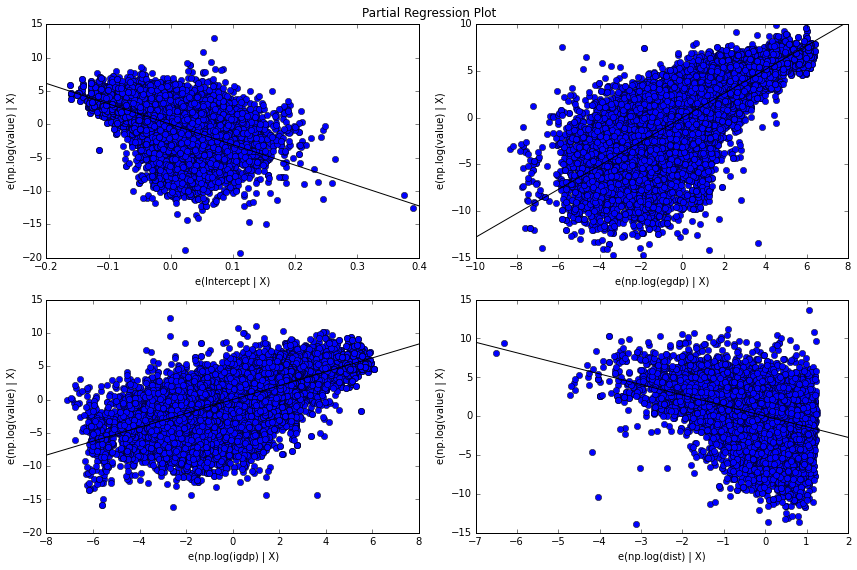

In [45]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(result1, fig=fig)